In [1]:
import sys
sys.path.append('/home/wangs/rs/lib')
import ff
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("pastel")
from multiprocessing import Pool
from tqdm import tqdm
import statsmodels.api as sm

In [2]:
high_judge = (ff.read('close') > ff.read('close').rolling(239,axis = 1,closed = 'left').max()).replace({False:np.nan,True:1.0}).loc[:,'20200102':'20240101']

In [3]:
cumret = (ff.rets_all.rolling(60,axis = 1,closed='left').sum()).loc[:,'20200102':'20240101']

In [4]:
turnover_mean = (ff.read('turnover').rolling(60, axis = 1,closed = 'left').mean()).loc[:,'20200102':'20240101']

In [16]:
fac_ret = high_judge * cumret

In [22]:
ret_gr1 = (fac_ret < fac_ret.median()).replace({True:1.0,False:np.nan})
ret_gr2 = (fac_ret >= fac_ret.median()).replace({True:1.0,False:np.nan})

In [ ]:
ret_gr1

In [105]:
ret = (close_ - close_.shift(axis = 1))/close_.shift(axis = 1)
day = '20210104'
buy_stock =  (event*ff.filter1.loc[:,'20200102':'20240101'])[day].dropna().sort_values().head(20).index
ret.loc[buy_stock].rolling(5,axis = 1).sum().shift(-5,axis = 1)[day].mean()

-0.10083274170181575

In [135]:
event = cumret
close_ = ff.read('close').loc[:,'20200102':'20240101']
ret = (close_ - close_.shift(axis = 1))/close_.shift(axis = 1)
ret_all = []
for day in event.columns:
    buy_stock =  (event*ff.filter1.loc[:,'20200102':'20240101'])[day].dropna().sort_values().head(10).index
    ret_all.append(ret.loc[buy_stock].rolling(20,axis = 1).sum().shift(-20,axis = 1)[day].mean()/20)
ret_all[-1] = 0.0
print('前期涨跌幅因子，每日购入因子值最大的20只股票，并持有30天计算平均收益率，所得累积收益率曲线')
ff.cal_returns(pd.Series(ret_all))
# plt.plot(list(np.cumsum(ret_all)))

前期涨跌幅因子，每日购入因子值最大的20只股票，并持有30天计算平均收益率，所得累积收益率曲线


{'年化收益率': 0.1197943884146797,
 '年化波动率': 0.07697986097349713,
 '夏普率': 1.5561782900065628,
 '最大回撤': -0.35169827608650833,
 '收益回撤比': 0.34061693377539753,
 '胜率': 0.481,
 '盈亏比': 1.3595100752081528}

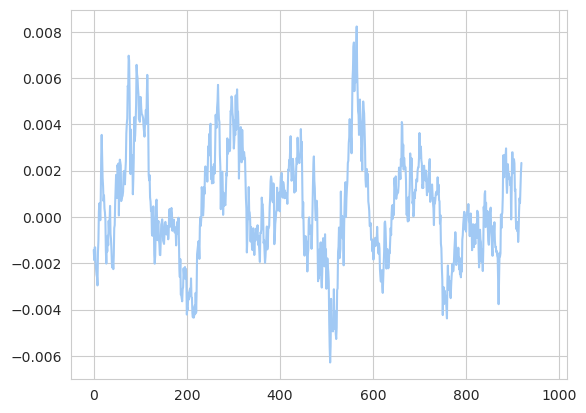

In [127]:
plt.plot(ret_all)

In [ ]:
high_l = (high_num.sum() < 20).replace({False:np.nan,True:1.0})
high_m = ((high_num.sum() >=20) * (high_num.sum() < 50)).replace({False:np.nan,True:1.0})
high_h =  (high_num.sum() > 50).replace({False:np.nan,True:1.0})

In [ ]:
cum_L = (cumret < cumret.median()).replace({False:np.nan,True:1.0})

In [ ]:
tur_L = ((turnover_mean < turnover_mean.median()).replace({False:np.nan,True:1.0}))

In [ ]:
cumret * high_num

In [14]:
high_judge

,20200102,20200103,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,...,20231218,20231219,20231220,20231221,20231222,20231225,20231226,20231227,20231228,20231229
000001.SZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000002.SZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000004.SZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000005.SZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000006.SZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873706.BJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873726.BJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873806.BJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873833.BJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
((ff.read('close') * ff.read('post')).pct_change(1,axis = 1)*ff.filter0).mean().sum()

1.6456479815829463